In [42]:
import numpy as np 
import pandas as pd
import os
import gzip
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [49]:
dataDir = "../analytic/graph_nve_tip4p/"
# dataDir = "../tube/tube20/perm/"
dataWaterArr = []
for simDir in os.listdir(dataDir):
    waterArr = []
    if simDir == "pressure":
        for step in os.listdir(dataDir+simDir):
            currPath = dataDir+simDir+'/'+step
            waterArr.append(currPath)
        if waterArr:
            dataWaterArr.append(waterArr)
        else:
            print("No water array created for: " + dataDir+simDir)

In [50]:
allWaterDF = []
timesteps = []
for waterArr in dataWaterArr:
    waterDFS = []
    for waterData in waterArr:
        with gzip.open(waterData) as f:
            f.readline().rstrip()
            timestep = f.readline().rstrip().decode("utf-8") 
        timesteps.append(timestep)
        idf = pd.read_csv(waterData).iloc[7:,:]
        dfCols = idf.iloc[0,].str.split(' ')[0]
        del dfCols[0:2]
        df = idf.iloc[1:,:]['ITEM: TIMESTEP'].str.split(' ', expand=True)
        df.set_axis(dfCols,axis=1,inplace=True)
        df.reset_index(drop=True, inplace=True)
        df = df.apply(pd.to_numeric)
        df = df[df.type != 3]
        waterDFS.append(df)
        totalstressvol = 0
        totalvol = 0
#         totalstressvol += df['c_peratomstressvol[1]'].sum()
#         totalstressvol += df['c_peratomstressvol[2]'].sum()
#         totalstressvol += df['c_peratomstressvol[3]'].sum()
    allWaterDF.append(waterDFS)  

-158.96987174066265
[143.10692063897977, -74.54199183705987, -276.4331607032804, -244.20955054297198, -220.7092343684279, -377.9421101584867, -218.82672802079685, 23.42548608096156, -154.5060802461336, -278.5082005787461, -69.5239394113274]


In [51]:
print(timesteps)
print(calcvol)

['10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '5000', '50000', '55000']


NameError: name 'calcvol' is not defined

In [37]:
# for graph/water

bin_size = 1
z_min = -80
z_max = 80
x_min = 0
x_max = 80
y_min = 0
y_max = 80
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

In [37]:
# for graph/water

bin_size = 1
z_min = -59
z_max = 59
x_min = 0
x_max = 71.3436
y_min = 0
y_max = 86.4995
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

In [5]:
# for water pump

bin_size = 1
z_min = -2
z_max = 83
x_min = -0.758241
x_max = 41.5165+0.758241
y_min = -0.758241
y_max = 41.5165+0.758241
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

In [10]:
# for water wall

bin_size = 1
z_min = 0
z_max = 79
x_min = 0.265749
x_max = 39.4685-0.265749
y_min = 0.265749
y_max = 39.4685-0.265749
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

In [4]:
# for nvt long

bin_size = 1
z_min = -3
z_max = 167
x_min = -0.832306
x_max = 41.6646
y_min = -0.832306
y_max = 41.6646
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

In [45]:
# for nvt

bin_size = 1
z_min = 0
z_max = 42
x_min = 0
x_max = 41.8712
y_min = 0
y_max = 41.8712
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

In [29]:
# for stat wall

bin_size = 1
z_min = -144
z_max = 144
x_min = 0
x_max = 39
y_min = 0
y_max = 39
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

In [28]:
# for slit

bin_size = 2
z_min = -80
z_max = 80
x_min = -2.14
x_max = 174.7
y_min = 0
y_max = 100
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

In [6]:
# for tube

bin_size = 2
z_min = 5
z_max = 165
x_min = -50
x_max = 50
y_min = -50
y_max = 50
x_len = x_max - x_min
y_len = y_max - y_min
ang3_to_cm3 = (1e8)**3
avo_num = 6.0221409e+23

In [52]:
i = 0
for dfSet in allWaterDF:
    pressureSeries = []
    stressVolSeries = []
    densitySeries = []
    volSeries = []
    volCheckSeries = []
    stressVolCheckSeries = []
    pressCheckSeries = []
    pressBinSeries = []
    totalpresscheckseries = []
    for df in dfSet:
        dfMol = pd.DataFrame()
        df['xmass'] = df['mass'] * df['x']
        df['ymass'] = df['mass'] * df['y']
        df['zmass'] = df['mass'] * df['z']
        
        #df['vxmass'] = df['mass'] * df['vx']
        #df['vymass'] = df['mass'] * df['vy']
        #df['vzmass'] = df['mass'] * df['vz']
        
        dfMol['mass'] = df['mass'].groupby(df.index // 3).sum()
        dfMol['xmass'] = df['xmass'].groupby(df.index // 3).sum()
        dfMol['ymass'] = df['ymass'].groupby(df.index // 3).sum()
        dfMol['zmass'] = df['zmass'].groupby(df.index // 3).sum()
        #dfMol['vxmass'] = df['vxmass'].groupby(df.index // 3).sum()
        #dfMol['vymass'] = df['vymass'].groupby(df.index // 3).sum()
        #dfMol['vzmass'] = df['vzmass'].groupby(df.index // 3).sum()
        
        dfMol['stressvol'] = df['v_peratompress'].groupby(df.index // 3).sum()
        dfMol['vol'] = df['c_peratomvol[1]'].groupby(df.index // 3).sum()
        
        dfMol['x'] = dfMol['xmass'] / dfMol['mass']
        dfMol['y'] = dfMol['ymass'] / dfMol['mass']
        dfMol['z'] = dfMol['zmass'] / dfMol['mass']
        dfMol['r'] = (dfMol['x']**2 + dfMol['y']**2)**(1/2)
        
        #dfMol['vx'] = dfMol['vxmass'] / dfMol['mass']
        #dfMol['vy'] = dfMol['vymass'] / dfMol['mass']
        #dfMol['vz'] = dfMol['vzmass'] / dfMol['mass']
        
        dfMol['press'] = - dfMol['stressvol'] / (3 * dfMol['vol'])
        
        
        dfMol['bin'] = pd.cut(dfMol['z'], range(z_min,z_max,bin_size),labels=False)
        stepDF_mean = dfMol.groupby(['bin'], dropna=True).mean()
        dfMol['density'] = (dfMol['mass'] / (x_len * y_len * bin_size)) * ang3_to_cm3 / avo_num
        dfMol['pressbin'] = -(dfMol['stressvol'] / (3 * x_len * y_len * bin_size))
        stepDF_sum = dfMol.groupby(['bin'], dropna=True).sum()
        stepDF_mean['presscheck'] = -stepDF_mean['stressvol']/(3*stepDF_mean['vol'])
        
#         dfMol['rbin'] = pd.cut(dfMol['r'], np.linspace(0,y_max,num=y_max*5),labels=False)
#         stepDF_radialbin_mean = dfMol[dfMol['z'].between(z_min,z_max)].groupby(['rbin'], dropna=False).mean()
        
#         dfMol['ybin'] = pd.cut(dfMol['y'], np.linspace(y_min,y_max,num=y_len*5),labels=False)
#         stepDF_ybin_mean = dfMol[dfMol['z'].between(z_min,z_max)].groupby(['ybin'], dropna=False).mean()
        
        pressureSeries.append(stepDF_mean['press'].rename(timesteps[i], axis=1))
        stressVolSeries.append(stepDF_mean['stressvol'].rename(timesteps[i], axis=1))
        volSeries.append(stepDF_mean['vol'].rename(timesteps[i], axis=1))
        
#         vxSeries.append(stepDF_ybin_mean['vx'].rename(timesteps[i], axis=1))
#         vySeries.append(stepDF_ybin_mean['vy'].rename(timesteps[i], axis=1))
#         vzSeries.append(stepDF_ybin_mean['vz'].rename(timesteps[i], axis=1))
        
        densitySeries.append(stepDF_sum['density'].rename(timesteps[i], axis=1))
        volCheckSeries.append(stepDF_sum['vol'].rename(timesteps[i], axis=1))
        stressVolCheckSeries.append(stepDF_sum['stressvol'].rename(timesteps[i], axis=1))
        pressCheckSeries.append(stepDF_mean['presscheck'].rename(timesteps[i], axis=1))
        pressBinSeries.append(stepDF_sum['pressbin'].rename(timesteps[i], axis=1))
        i += 1
pressureSeriesDF = pd.concat(pressureSeries, axis=1, ignore_index=False)
stressVolSeriesDF = pd.concat(stressVolSeries, axis=1, ignore_index=False)
volSeriesDF = pd.concat(volSeries, axis=1, ignore_index=False)
# vxSeriesDF = pd.concat(vxSeries, axis=1, ignore_index=False)
# vySeriesDF = pd.concat(vySeries, axis=1, ignore_index=False)
# vzSeriesDF = pd.concat(vzSeries, axis=1, ignore_index=False)
densitySeriesDF = pd.concat(densitySeries, axis=1, ignore_index=False)
volCheckSeriesDF = pd.concat(volCheckSeries, axis=1, ignore_index=False)
stressVolCheckSeriesDF = pd.concat(stressVolCheckSeries, axis=1, ignore_index=False)
pressCheckSeriesDF = pd.concat(pressCheckSeries, axis=1, ignore_index=False)
pressBinSeriesDF = pd.concat(pressBinSeries, axis=1, ignore_index=False)

In [53]:
densitySeriesDF['mean'] = densitySeriesDF.mean(axis=1)
pressBinSeriesDF['mean'] = pressBinSeriesDF.mean(axis=1)
volCheckSeriesDF['mean'] = volCheckSeriesDF.sum(axis=1)
stressVolCheckSeriesDF['mean'] = stressVolCheckSeriesDF.sum(axis=1)
# pressureCheckSeriesDF['mean'] = -stressVolCheckSeriesDF['mean']/(3*volCheckSeriesDF['mean'])
pressCheckSeriesDF['mean'] = pressCheckSeriesDF.mean(axis=1)
# vxSeriesDF['mean'] = vxSeriesDF.mean(axis=1)
# vySeriesDF['mean'] = vySeriesDF.mean(axis=1)
# vzSeriesDF['mean'] = vzSeriesDF.mean(axis=1)
stressVolSeriesDF['mean'] = stressVolSeriesDF.mean(axis=1)
volSeriesDF['mean'] = volSeriesDF.mean(axis=1)
pressureSeriesDF['mean'] = pressureSeriesDF.mean(axis=1)
volSeriesDF['mean'] = volSeriesDF.mean(axis=1)

In [40]:
print(pressCheckSeriesDF['mean'].mean())
print(pressCheckSeriesDF['mean'].std())

-406.7276927247372
1088.5170032109265


<AxesSubplot:xlabel='bin'>

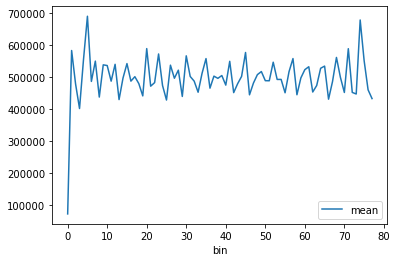

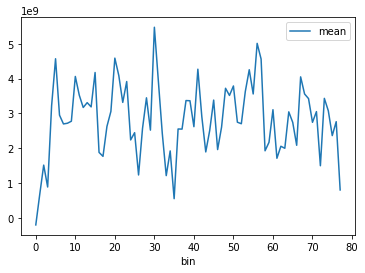

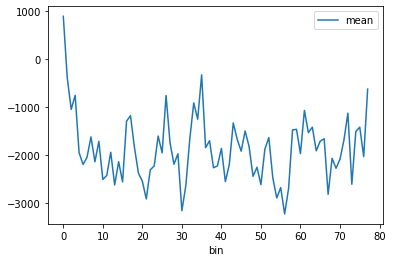

In [13]:
volCheckSeriesDF.plot(y='mean', use_index=True)
stressVolCheckSeriesDF.plot(y='mean', use_index=True)
# pressureCheckSeriesDF.plot(y='mean', use_index=True)
pressCheckSeriesDF.plot(y='mean', use_index=True)

<AxesSubplot:xlabel='bin'>

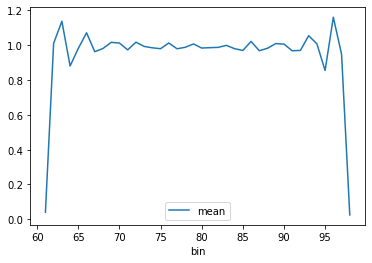

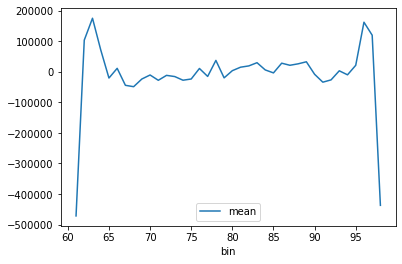

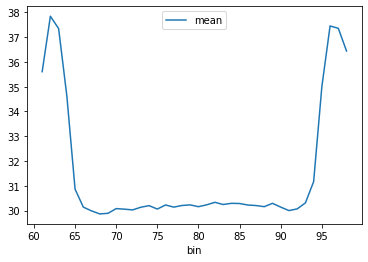

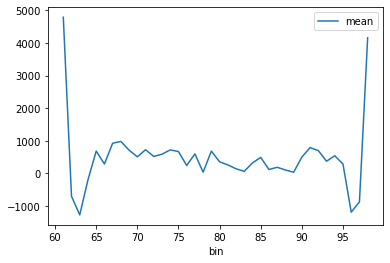

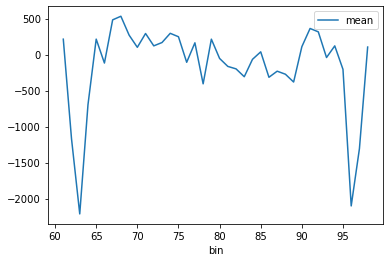

In [58]:
densitySeriesDF.plot(y='mean', use_index=True)
stressVolSeriesDF.plot(y='mean', use_index=True)
volSeriesDF.plot(y='mean', use_index=True)
pressureSeriesDF.plot(y='mean', use_index=True)
pressBinSeriesDF.plot(y='mean', use_index=True)

In [57]:
def nvtpressurePlot(df,title,filename,scale=False):
    df['z'] = df.index * bin_size
#     print(df['mean'].iloc[11:50].mean())
#     print(df['mean'].iloc[225:375].mean())
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in z-direction (angstrom)')
    ax.set_ylabel('Pressure (ATM)')
    if scale:
        ax.set_ylim(df['mean'].mean()-df['mean'].std(),df['mean'].mean()+df['mean'].std())
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')
    
def nvtvolPlot(df,title,filename,scale=False):
    df['z'] = df.index * bin_size
#     print(df['mean'].iloc[11:50].mean())
#     print(df['mean'].iloc[225:375].mean())
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in z-direction (angstrom)')
    ax.set_ylabel('Molecular volume (angstrom^3)')
    if scale:
        ax.set_ylim(df['mean'].mean()-df['mean'].std(),df['mean'].mean()+df['mean'].std())
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')
    
def nvtstressVolPlot(df,title,filename,scale=False):
    df['z'] = df.index * bin_size
#     print(df['mean'].iloc[11:50].mean())
#     print(df['mean'].iloc[225:375].mean())
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in z-direction (angstrom)')
    ax.set_ylabel('stress-volume (ATM angstrom^3)')
    if scale:
        ax.set_ylim(df['mean'].mean()-df['mean'].std(),df['mean'].mean()+df['mean'].std())
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')
    
def nvtdensityPlot(df,title,filename,scale=False):
    df['z'] = df.index * bin_size
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in z-direction (angstrom)')
    ax.set_ylabel('Density (g/cm^3)')
    if scale:
        ax.set_ylim(df['mean'].mean()-df['mean'].std(),df['mean'].mean()+df['mean'].std())
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')

In [55]:
print(pressBinSeriesDF['mean'].iloc[10:30].mean())
print(densitySeriesDF['mean'].iloc[10:30].mean())

-42.39361510487689
0.9910614708768801


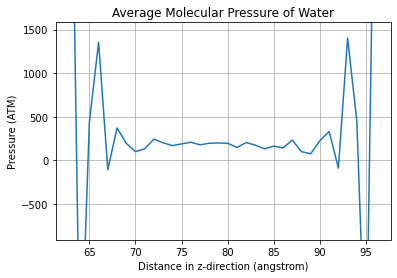

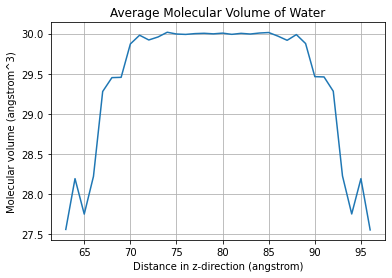

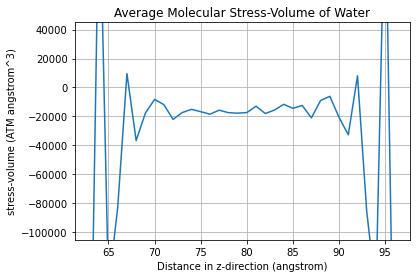

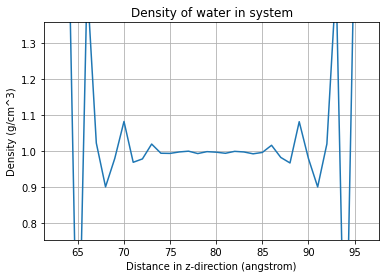

In [58]:
nvtpressurePlot(pressBinSeriesDF,\
             'Average Molecular Pressure of Water', \
             './plots/nve100_pressure.png',scale=True)
nvtvolPlot(volSeriesDF,\
             'Average Molecular Volume of Water', \
             './plots/nve100_volume.png')
nvtstressVolPlot(stressVolSeriesDF,\
             'Average Molecular Stress-Volume of Water', \
             './plots/nve100_stressvolume.png',scale=True)
nvtdensityPlot(densitySeriesDF,\
             'Density of water in system', \
             './plots/nve100_density.png',scale=True)

In [32]:
def statpressurePlot(df,title,filename):
    df['z'] = df.index * bin_size
#     print(df['mean'].iloc[11:50].mean())
#     print(df['mean'].iloc[225:375].mean())
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in z-direction (angstrom)')
    ax.set_ylabel('Pressure (ATM)')
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')
    
def statvolPlot(df,title,filename):
    df['z'] = df.index * bin_size
#     print(df['mean'].iloc[11:50].mean())
#     print(df['mean'].iloc[225:375].mean())
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in z-direction (angstrom)')
    ax.set_ylabel('Molecular volume (angstrom^3)')
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')
    
def statstressVolPlot(df,title,filename):
    df['z'] = df.index * bin_size
#     print(df['mean'].iloc[11:50].mean())
#     print(df['mean'].iloc[225:375].mean())
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in z-direction (angstrom)')
    ax.set_ylabel('stress-volume (ATM angstrom^3)')
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')
    
def statdensityPlot(df,title,filename):
    df['z'] = df.index * bin_size
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in z-direction (angstrom)')
    ax.set_ylabel('Density (g/cm^3)')
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')

In [16]:
print(pressureSeriesDF['mean'].mean())
print(pressureSeriesDF['mean'].std())

4827.213338103897
1443.744937313356


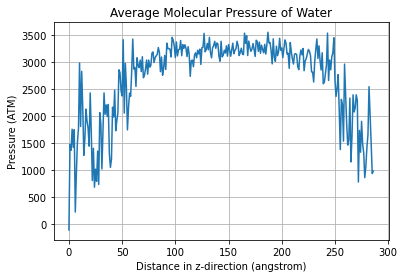

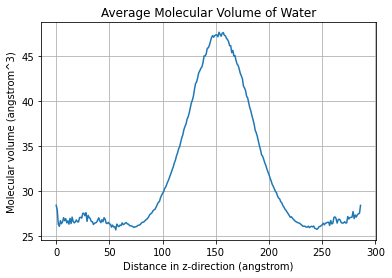

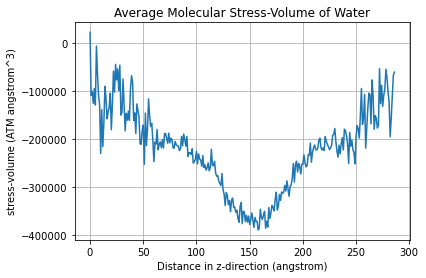

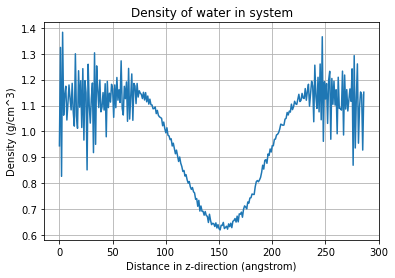

In [40]:
statpressurePlot(pressureSeriesDF,\
             'Average Molecular Pressure of Water', \
             './plots/1stat_wall_pressure.png')
statvolPlot(volSeriesDF,\
             'Average Molecular Volume of Water', \
             './plots/1stat_wall_volume.png')
statstressVolPlot(stressVolSeriesDF,\
             'Average Molecular Stress-Volume of Water', \
             './plots/1stat_wall_stressvolume.png')
statdensityPlot(densitySeriesDF,\
             'Density of water in system', \
             './plots/1stat_wall_density.png')

In [15]:
def pressurePlot(df,title,filename):
    df['z'] = df.index * bin_size
    df['mean'] = df['mean'] / df['mean'].mean()
#     print(df['mean'].iloc[11:50].mean())
#     print(df['mean'].iloc[225:375].mean())
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in direction (z) of flow (angstrom)')
    ax.set_ylabel('Normalized pressure (-)')
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')

    
def volPlot(df,title,filename):
    df['z'] = df.index * bin_size
    df['mean'] = df['mean'] / df['mean'].iloc[11:50].mean()
#     print(df['mean'].iloc[11:50].mean())
#     print(df['mean'].iloc[225:375].mean())
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in direction (z) of flow (angstrom)')
    ax.set_ylabel('Normalized volume (-)')
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename)
    
def stressVolPlot(df,title,filename):
    df['z'] = df.index * bin_size
    df['mean'] = df['mean'] / df['mean'].iloc[11:50].mean()
#     print(df['mean'].iloc[11:50].mean())
#     print(df['mean'].iloc[225:375].mean())
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in direction (z) of flow (angstrom)')
    ax.set_ylabel('Normalized stress-vol (-)')
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename)
    
def membranePressurePlot(df,title,filename):
    df['z'] = df.index * bin_size
    df['mean'] = df['mean'] / max(df['mean'].iloc[df.idxmax(axis=0)['mean']],abs(df['mean'].iloc[df.idxmin(axis=0)['mean']]))
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in direction (z) of flow (angstrom)')
    ax.set_ylabel('Normalized pressure (-)')
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename)
    
def membraneVelocityPlot(df,title,filename):
    df['z'] = df.index * bin_size
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in direction (z) of flow (angstrom)')
    ax.set_ylabel('Velocity (angstrom/fs)')
    ax.legend().remove()
    ax.set_ylim(-4e-3,4e-3)
    ax.grid(b=True)
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.0e'))
    plt.savefig(filename)
    
def velocityPlot(df,title,filename):
    df['y'] = df.index * 0.2
    ax = df.plot(x='y', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in direction normal to flow (y-direction) (angstrom)')
    ax.set_ylabel('Velocity (angstrom/fs)')
#     ax.set_ylim(-2e-4,2e-4)
    ax.set_xlim(40,60)
    ax.grid(b=True)
    ax.legend().remove()
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1e'))
    plt.savefig(filename,bbox_inches='tight')
    
def velocityPlot_tube(df,title,filename):
    df['r'] = df.index * 0.2
    ax = df.plot(x='r', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Radial Distance from Center (angstrom)')
    ax.set_ylabel('Velocity (angstrom/fs)')
#     ax.set_xlim(0,20)
    ax.grid(b=True)
    ax.legend().remove()
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1e'))
    plt.savefig(filename,bbox_inches='tight')
    
def densityPlot(df,title,filename):
    df['z'] = df.index * bin_size
    df['mean'] = df['mean']
    ax = df.plot(x='z', y='mean')
    ax.set_title(title)
    ax.set_xlabel('Distance in direction (z) of flow (angstrom)')
    ax.set_ylabel('Density (g/cm^3)')
    ax.set_xlim(10,175)
    ax.set_ylim(0.9,1.1)
    ax.grid(b=True)
    ax.legend().remove()
    plt.savefig(filename,bbox_inches='tight')

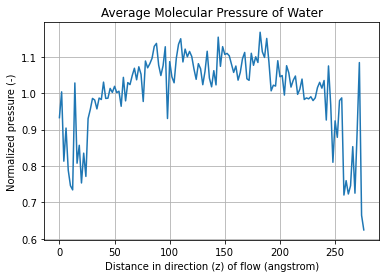

In [16]:
pressurePlot(pressureSeriesDF,\
             'Average Molecular Pressure of Water', \
             './plots/stat_wall_pressure.png')


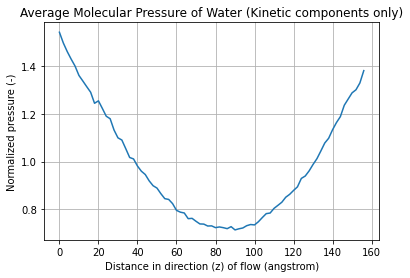

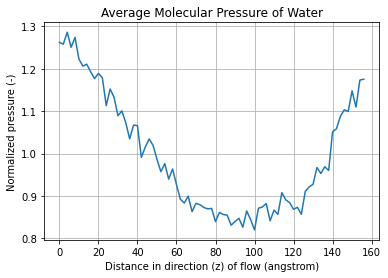

In [24]:
pressurePlot(kePressureSeriesDF,\
             'Average Molecular Pressure of Water (Kinetic components only)', \
             './plots/tube20kepressure.png')
pressurePlot(pressureSeriesDF,\
             'Average Molecular Pressure of Water', \
             './plots/tube20pressure.png')

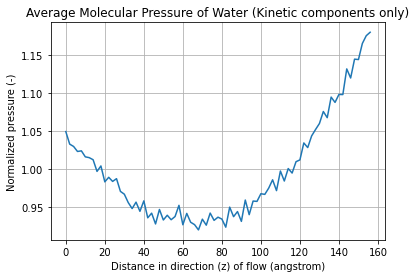

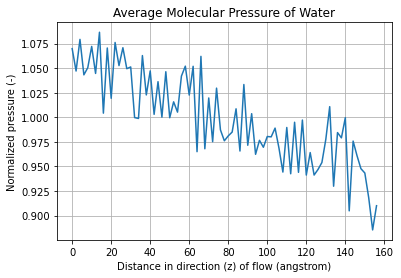

In [35]:
pressurePlot(kePressureSeriesDF,\
             'Average Molecular Pressure of Water (Kinetic components only)', \
             './plots/slit20kepressure.png')
pressurePlot(pressureSeriesDF,\
             'Average Molecular Pressure of Water', \
             './plots/slit20pressure.png')

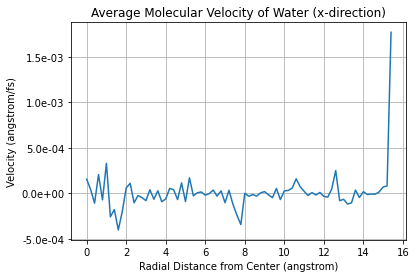

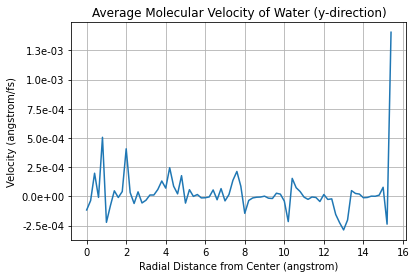

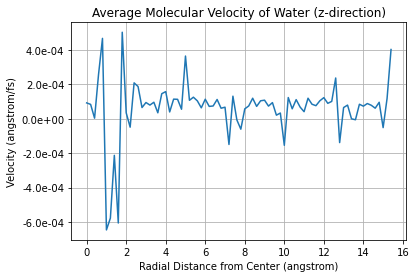

In [25]:
velocityPlot_tube(vxSeriesDF,\
             'Average Molecular Velocity of Water (x-direction)', \
             './plots/tube20water_vx.png')
velocityPlot_tube(vySeriesDF,\
             'Average Molecular Velocity of Water (y-direction)', \
             './plots/tube20water_vy.png')
velocityPlot_tube(vzSeriesDF,\
             'Average Molecular Velocity of Water (z-direction)', \
             './plots/tube20water_vz.png')

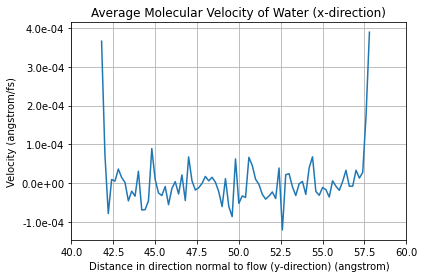

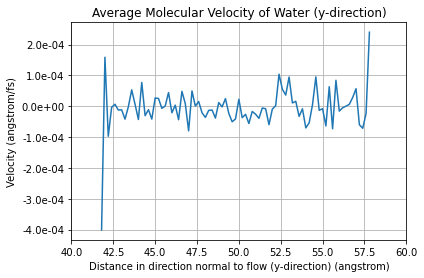

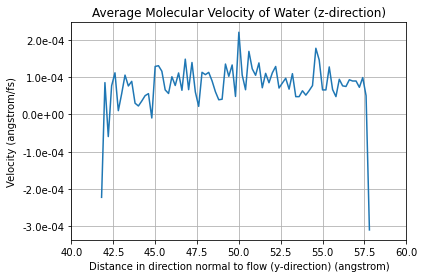

In [36]:
velocityPlot(vxSeriesDF,\
             'Average Molecular Velocity of Water (x-direction)', \
             './plots/slit20water_vx.png')
velocityPlot(vySeriesDF,\
             'Average Molecular Velocity of Water (y-direction)', \
             './plots/slit20water_vy.png')
velocityPlot(vzSeriesDF,\
             'Average Molecular Velocity of Water (z-direction)', \
             './plots/slit20water_vz.png')

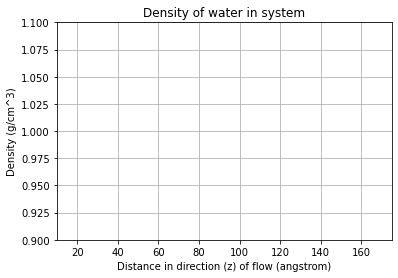

In [67]:
densityPlot(densitySeriesDF,\
             'Density of water in system', \
             './plots/slit20water_density.png')